In [5]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy import special
import matplotlib.pyplot as plt

import sage.all as sg

from IPython.display import display, Math

In [2]:
def show(x):
    display(Math(sg.latex(x)))

# Verify hist

In [6]:
def v_pdf(v0, ve, res=10000):
    v_s = np.linspace(0, ve, res)
    pdf_unnormed = (np.exp(- v_s**2/v0**2) - np.exp(- ve**2/v0**2)) * v_s**2
    return v_s, pdf_unnormed / np.trapz(pdf_unnormed, v_s)

def sample_v(v0, ve, n):
    """sample via inverse cdf"""
    v_s, pdf = v_pdf(v0, ve)
    cdf = np.cumsum(pdf)
    cdf /= cdf[-1]
    r = np.random.rand(n)
    return np.interp(r, cdf, v_s)

def sample_unit_vec(n):
    v = np.random.randn(n, 3)
    return v / np.linalg.norm(v, axis=1)[:, np.newaxis]

Text(0.5, 1.0, 'f(v)')

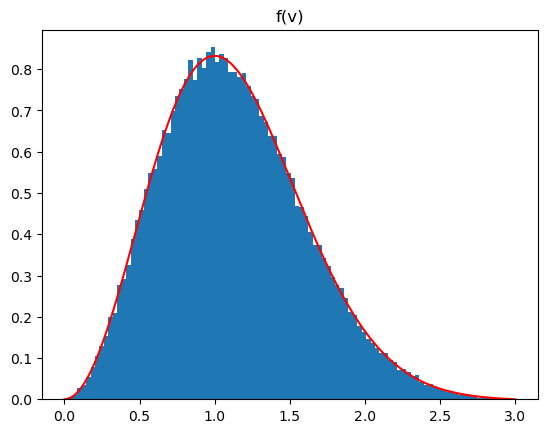

In [ ]:
v0 = 1
ve = 3
n = 100000
v_sample = sample_v(v0, ve, n)
v_s, pdf = v_pdf(v0, ve)
plt.hist(v_sample, bins=100, density=True)
plt.plot(v_s, pdf, 'r')
plt.title("f(v)");

In [9]:
v0 = 2
ve = 3
n = 100000
v1_sample = sample_v(v0, ve, n)[:,None] * sample_unit_vec(n)
v2_sample = sample_v(v0, ve, n)[:,None] * sample_unit_vec(n)
rel_v_sample = np.linalg.norm(v1_sample - v2_sample, axis=1)

In [10]:
def v_rel_dist(ve, v0, res=10000):
    EPSILON = 1e-10
    v_rel_s = np.linspace(EPSILON, 2*ve - EPSILON, res)
    u = v_rel_s / v0
    b = ve / v0
    C = np.exp(-b**2)
    f = np.sqrt(8*np.pi) * np.exp(-u**2/2) * special.erf((2*b-u)/np.sqrt(2)) \
    + 4 * C**2 * (np.exp((2*b-u) * u) - 1) / u \
    + 8 * np.sqrt(np.pi) * C * (special.erf(u-b) - special.erf(b)) \
    + 2/3 * C**2 * (16 * b**3 - 12 * b**2 * u + u**3 + 24 * b - 12 * u)
    return v_rel_s, f / np.trapz(f, v_rel_s)

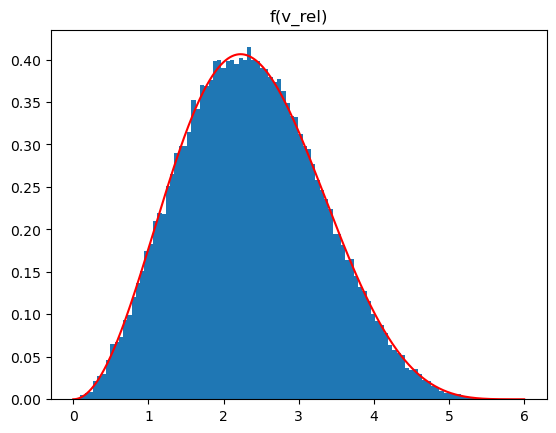

In [11]:
plt.hist(rel_v_sample, bins=100, density=True)
v_rel_s, f = v_rel_dist(ve, v0)
f /= np.trapz(v_rel_s**2 * f, v_rel_s)
plt.plot(v_rel_s, v_rel_s**2 * f, 'r')
plt.title("f(v_rel)");

# Find expression

In [ ]:
u = sg.var('u')
sg.assume(u>0)
s = sg.var('s')
z = sg.var('z')
b = sg.var('b')
S = sg.var('S')
sg.assume(S>0)
C = sg.exp(-b**2)
Z = sg.var('Z')
sg.assume(Z>0)

In [ ]:
integrand = (4*b**2-(u-z)**2)
integral = sg.integrate(integrand, (z, -Z, 0)).full_simplify()
integral = integral.substitute(Z==2*b-u).full_simplify()
show(integral)

<IPython.core.display.Math object>